## **BAB I — PENDAHULUAN**

### **1.1 Identitas**

* **Nama**: \Anis Marsela
* **Topik**: Klasifikasi Emosi pada Kalimat Menggunakan Natural Language Processing (NLP)
* **Tools**: Python, Jupyter Notebook, Pandas, Scikit-Learn / TensorFlow, Matplotlib, Hugging Face Datasets
* **Dataset**: Emotions Dataset for NLP Classification Tasks
* **Sumber Dataset**:
  [https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)

---

### **1.2 Gambaran Umum Dataset**

Dataset ini merupakan kumpulan kalimat pendek dalam bahasa Inggris yang diberi label emosi. Setiap baris terdiri dari teks dan satu label emosi, dipisahkan oleh titik koma (`;`). Dataset dibagi menjadi tiga bagian utama:

* **train.txt** — data latih
* **val.txt** — data validasi
* **test.txt** — data uji

Contoh format data:

```
i feel like I am still looking at a blank canvas blank pieces of paper;sadness
i left with my bouquet of red and yellow tulips under my arm;joy
```

Dataset ini berisi 6 emosi utama:

* **joy**
* **sadness**
* **anger**
* **fear**
* **love**
* **surprise**

Distribusi label sudah cukup seimbang untuk kebutuhan pelatihan model klasifikasi berbasis teks.

---

### **1.3 Latar Belakang & Masalah yang Hendak Diselesaikan**

Dalam era digital saat ini, masyarakat semakin banyak mengekspresikan perasaan mereka melalui teks, baik di media sosial, email, maupun layanan pelanggan. Namun, tanpa sistem otomatis, mustahil untuk mengidentifikasi dan mengelompokkan emosi dari jutaan kalimat setiap harinya.

**Masalah yang ingin diselesaikan**:

> Bagaimana cara mengklasifikasikan emosi dari sebuah kalimat secara otomatis berdasarkan teks yang diberikan?

Model yang dibangun dari tugas ini bertujuan membantu:

* **Mendeteksi emosi pelanggan dari ulasan** (customer feedback)
* **Memantau suasana hati pengguna di media sosial**
* **Menjadi dasar sistem chatbot yang empatik dan responsif**

---

### **1.4 Justifikasi Masalah**

Penelitian sebelumnya telah menunjukkan bahwa deteksi emosi dari teks sangat penting untuk berbagai aplikasi, mulai dari sistem rekomendasi hingga layanan pelanggan berbasis AI. Menurut publikasi ACL 2018 oleh [Mohammad & Bravo-Marquez](https://aclanthology.org/D18-1404/), klasifikasi emosi merupakan tugas mendesak dalam NLP yang semakin dibutuhkan dalam skenario dunia nyata.

Selain itu, deteksi emosi digunakan dalam:

* **HR analytics** untuk mengukur kesehatan mental karyawan
* **EdTech** untuk menilai mood pelajar dalam pembelajaran daring
* **Brand monitoring** untuk menilai emosi publik terhadap kampanye produk

---

### **1.5 Target Pengguna**

Pengguna dari aplikasi/layanan berbasis model ini bisa meliputi:

* **Tim layanan pelanggan** untuk memahami emosi pengguna dari percakapan teks
* **Perusahaan media sosial** untuk moderasi dan analisis sentimen
* **Peneliti dan pengembang NLP** untuk pengembangan sistem yang lebih empatik
* **Layanan kesehatan mental** yang ingin memonitor emosi pasien secara tidak langsung melalui percakapan harian

---

### **1.6 Objective**

Tujuan dari proyek ini adalah:

* Membangun model klasifikasi emosi dari teks menggunakan metode NLP
* Mengolah dataset menjadi format siap pakai untuk pelatihan model
* Mengevaluasi performa model dalam mengenali emosi berdasarkan akurasi dan metrik lainnya
* Menyediakan visualisasi dan interpretasi dari hasil prediksi model



II. Import Library

In [6]:
# Import libraries for data handling
import pandas as pd
import numpy as np

# For preprocessing and NLP
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For progress bars
from tqdm import tqdm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


III. Data Loading

In [7]:
# Load dataset dari file .txt
def load_emotion_dataset(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split(';')
                if len(parts) == 2:
                    text, label = parts
                    data.append((text.strip(), label.strip()))
    return pd.DataFrame(data, columns=['text', 'label'])

# Load semua split: train, test, val
train_df = load_emotion_dataset('train.txt')
test_df = load_emotion_dataset('test.txt')
val_df = load_emotion_dataset('val.txt')

# Cek ukuran masing-masing dataset
print("Train dataset size:", train_df.shape)
print("Test dataset size:", test_df.shape)
print("Validation dataset size:", val_df.shape)

# Tampilkan beberapa contoh data
print("\nContoh data:")
display(train_df.sample(5))


Train dataset size: (16000, 2)
Test dataset size: (2000, 2)
Validation dataset size: (2000, 2)

Contoh data:


,text,label
9559,i feel that this is a very important subject t...,joy
15318,i am so hurt and feel so abused,sadness
258,i can feel myself gaining control over the dam...,sadness
12639,i feel like it would make the startled person ...,fear
1062,i feel rather intimidated by my re his impress...,fear


IV.EDA

Distribusi label pada train set:


label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

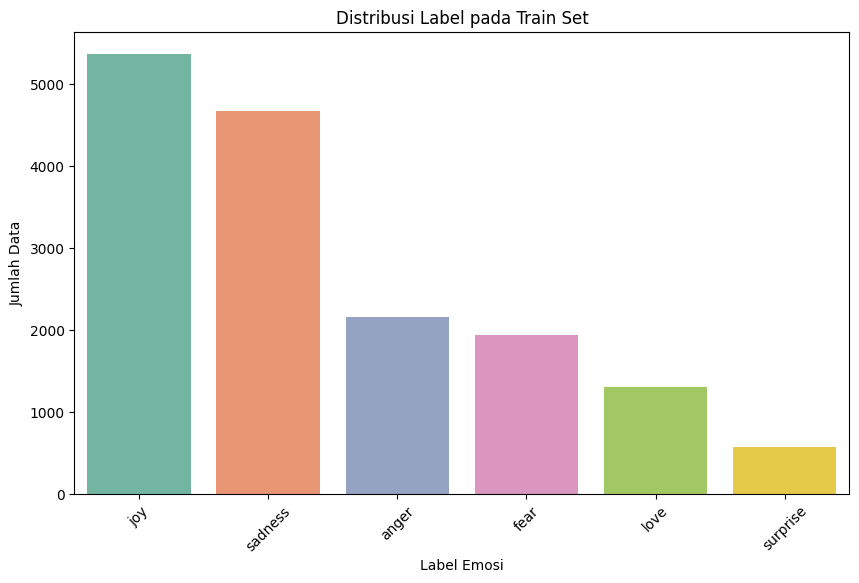


Statistik panjang teks (jumlah karakter):


count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: text_length, dtype: float64

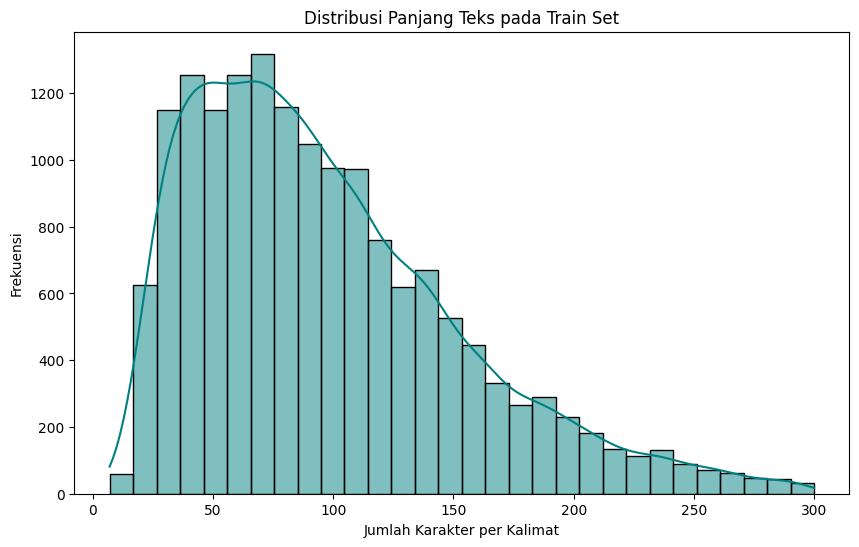


Label unik pada dataset:
['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']

Apakah ada duplikat pada train set? 1
Apakah ada missing values?
 text           0
label          0
text_length    0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek distribusi label pada masing-masing set
print("Distribusi label pada train set:")
display(train_df['label'].value_counts())

# Visualisasi distribusi label di train set
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index, palette='Set2')
plt.title('Distribusi Label pada Train Set')
plt.xlabel('Label Emosi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()

# Panjang karakter pada setiap kalimat
train_df['text_length'] = train_df['text'].apply(len)

# Statistik deskriptif panjang teks
print("\nStatistik panjang teks (jumlah karakter):")
display(train_df['text_length'].describe())

# Visualisasi distribusi panjang teks
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=30, kde=True, color='teal')
plt.title('Distribusi Panjang Teks pada Train Set')
plt.xlabel('Jumlah Karakter per Kalimat')
plt.ylabel('Frekuensi')
plt.show()

# Cek label unik
print("\nLabel unik pada dataset:")
print(train_df['label'].unique())

# Cek apakah ada duplikat atau missing values
print("\nApakah ada duplikat pada train set?", train_df.duplicated().sum())
print("Apakah ada missing values?\n", train_df.isnull().sum())


V. Feature enginering

In [9]:
# 1. Cleaning text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = re.sub(r"\s+", ' ', text).strip()
    return text

train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)

# 2. Tokenization
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['clean_text'])

# Convert to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['clean_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['clean_text'])
val_sequences = tokenizer.texts_to_sequences(val_df['clean_text'])

# 3. Padding
max_len = max(len(x) for x in train_sequences)
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post')

# 4. Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['label'])
test_labels = label_encoder.transform(test_df['label'])
val_labels = label_encoder.transform(val_df['label'])

# 5. Vocab size
vocab_size = len(tokenizer.word_index) + 1


## **ANN Training (Sequential API/Functional API)

 vi.1 Model Definition

In [10]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    GlobalAveragePooling1D(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Multi-class
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

vi.2 Model Training

In [14]:
history = model.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=15,
    batch_size=32,
    verbose=2
)


Epoch 1/15
500/500 - 4s - 8ms/step - accuracy: 0.9731 - loss: 0.0918 - val_accuracy: 0.8885 - val_loss: 0.3692
Epoch 2/15
500/500 - 3s - 6ms/step - accuracy: 0.9712 - loss: 0.0937 - val_accuracy: 0.8875 - val_loss: 0.3823
Epoch 3/15
500/500 - 3s - 6ms/step - accuracy: 0.9748 - loss: 0.0846 - val_accuracy: 0.8690 - val_loss: 0.4845
Epoch 4/15
500/500 - 3s - 6ms/step - accuracy: 0.9774 - loss: 0.0782 - val_accuracy: 0.8870 - val_loss: 0.4013
Epoch 5/15
500/500 - 3s - 6ms/step - accuracy: 0.9768 - loss: 0.0750 - val_accuracy: 0.8900 - val_loss: 0.3992
Epoch 6/15
500/500 - 3s - 6ms/step - accuracy: 0.9768 - loss: 0.0769 - val_accuracy: 0.8845 - val_loss: 0.4344
Epoch 7/15
500/500 - 3s - 6ms/step - accuracy: 0.9741 - loss: 0.0804 - val_accuracy: 0.8850 - val_loss: 0.4574
Epoch 8/15
500/500 - 3s - 6ms/step - accuracy: 0.9782 - loss: 0.0718 - val_accuracy: 0.8730 - val_loss: 0.5237
Epoch 9/15
500/500 - 3s - 6ms/step - accuracy: 0.9810 - loss: 0.0660 - val_accuracy: 0.8805 - val_loss: 0.4677
E

In [13]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0005),  # learning rate baru
    metrics=['accuracy']
)


 Model Evaluation

In [ ]:
# Plot akurasi
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Training vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Training vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_padded, test_labels, verbose=0)
print(f"Akurasi pada data uji: {test_acc:.4f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prediksi data uji
y_pred = model.predict(test_padded)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix pada Data Uji")
plt.show()

# Classification report
report = classification_report(test_labels, y_pred_labels, target_names=label_encoder.classes_)
print("Classification Report:\n")
print(report)


In [16]:
!python --version


Python 3.9.23


In [18]:
import tensorflow as tf
tf.__version__


'2.18.0'